In [9]:
# このファイルに必要なものはコピーしておくことが必要。
from PIL import Image,ImageDraw

im = Image.open("./logo.png")
draw = ImageDraw.Draw(im)
w, h = im.size  # 500x 500のはず
for i in (list(range(0, 500, 125)) + [499]):  
                # range には + はできないので、list に一旦変換
    draw.line([i,0,i,500],fill="black",width=3)
    draw.line([0,i,500,i],fill="black",width=3)
im.show()

(500, 500, 4)


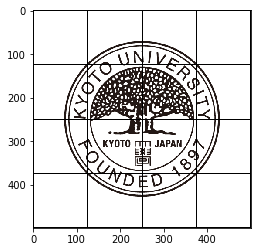

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

imarray = np.asarray(im)

#imarray は，画像のサイズ x 4 の rgba の配列
print(imarray.shape)

plt.imshow(imarray, aspect="equal")
plt.show()

In [11]:

# 第一成分(赤)だけをとってくる。
fst= imarray[:,:,3]

#(x, y) の点が 0 でない（つまり，色がついている）所の座標を [-1, 1]x [-1,1] に変換した座標のリストを作る。
original = [((y-250)/250,((250-x)/250)) for x in range(500) for y in range(500) if fst[x,y] != 0]

#その x　成分，y 成分の配列のペアとなる配列を作る
imagex = np.array([x for (x,y) in original])
imagey = np.array([y for (x,y) in original])
image = np.array([imagex, imagey])
image

array([[-1.   , -0.996, -0.992, ...,  0.988,  0.992,  0.996],
       [ 1.   ,  1.   ,  1.   , ..., -0.996, -0.996, -0.996]])

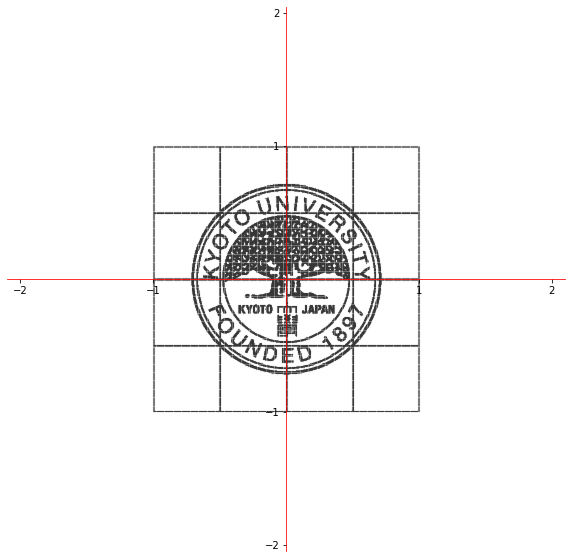

In [12]:


def showimage(image, size=2):
    """ image で与えられた点の集まりを全て plot した図を作る。size は描画する範囲が
    ([-size,size]x[-size,size])になるように指定。"""
    fig, ax = plt.subplots(figsize=(size*5,size*5))
    ax.set_aspect('equal', 'datalim') #x 軸と y 軸の目盛りを同じ幅にする。
    plt.scatter(*image, s=0.01, c="black")  # 0,01 は点のサイズ。
    
    #表示範囲の設定
    ax.set_ylim([-size-0.1,size+0.1])
    ax.set_xlim([-size-0.1, size+0.1])
    # 座標軸の設定(面倒だが、左と下ではなく、座標軸に数を入れるのに、他にいい方法はなさそう)
    for d in ['bottom', 'left']:
        ax.spines[d].set_position(('data', 0))
        ax.spines[d].set_color('red')
    ax.set_xticks([-2,-1,1, 2])
    ax.set_yticks([-2,-1,1, 2])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#    plt.show()

  
showimage(image)

In [18]:
#練習問題10

def rotate(t):
    u = t * np.pi/180
    a = np.array([[np.cos(u),-np.sin(u)],
                  [np.sin(u),np.cos(u)]])
    return a
n = 0

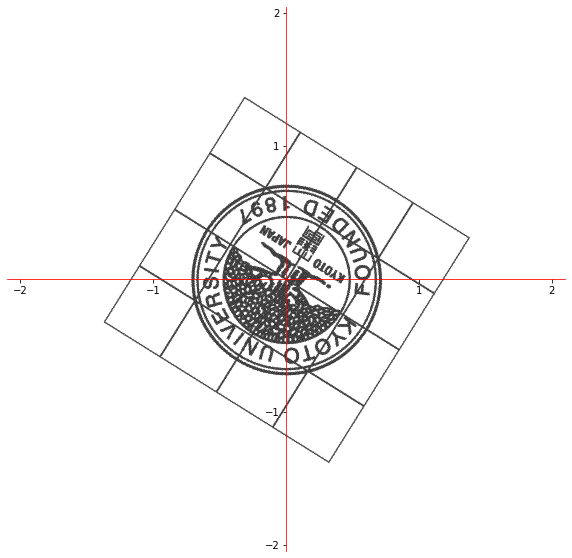

In [41]:
#ctrl + return で何度も実行できるようにした
showimage(rotate(n)@image)
n += 10

In [57]:
#練習問題20

def trans(a):
    showimage(a@image,a.max()+1)
#    showimage(a@image)

    plt.scatter(a[0][0],a[1][0], c="red")
    plt.scatter(a[0][1],a[1][1], c="blue")
    

In [57]:
#練習問題30
trans(rotate(30))

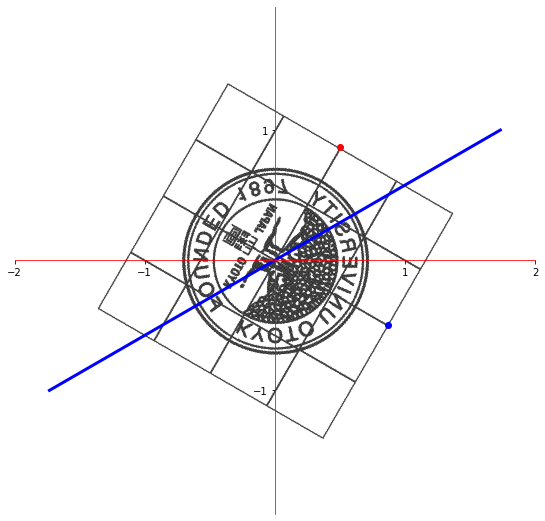

In [74]:
#練習問題35

def flip(t):
    a = np.array([[1,0],[0,-1]])
    b = rotate(t)@a@rotate(-t)
    return b

trans(flip(30))
u = 30 * np.pi/180
plt.plot([-2*np.cos(u),2*np.cos(u)],[-2*np.sin(u),2*np.sin(u)], 'b-', lw=3)   

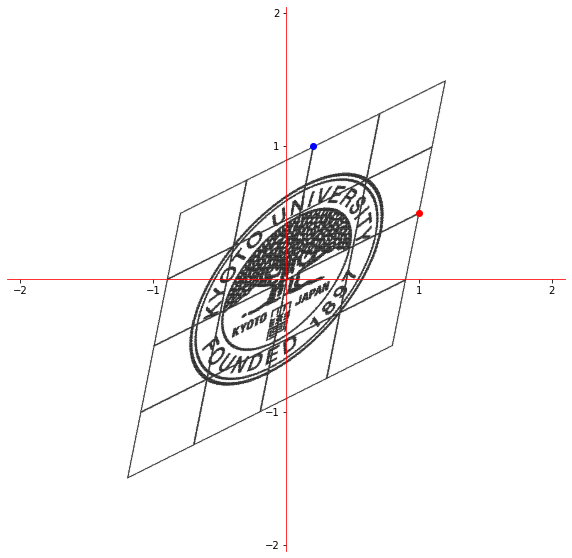

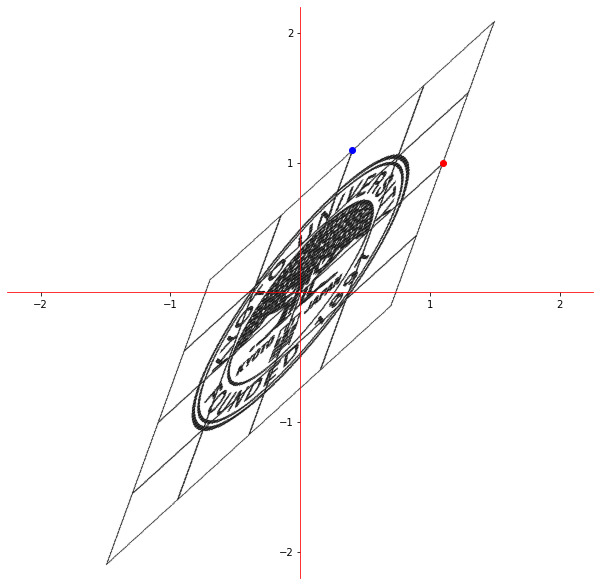

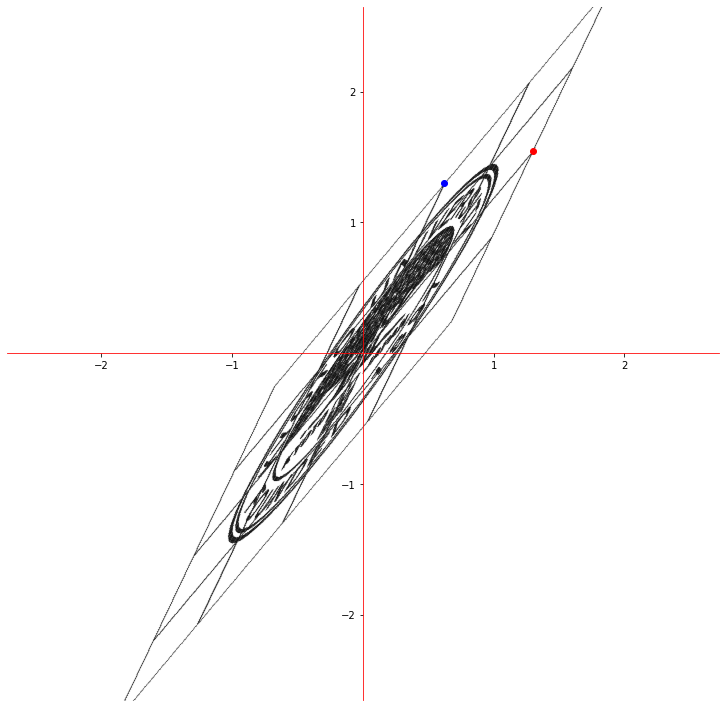

In [64]:
#練習問題40

a = np.array([[1,0.2],[0.5,1]])
trans(a)
trans(np.linalg.matrix_power(a, 2))
trans(np.linalg.matrix_power(a, 3))


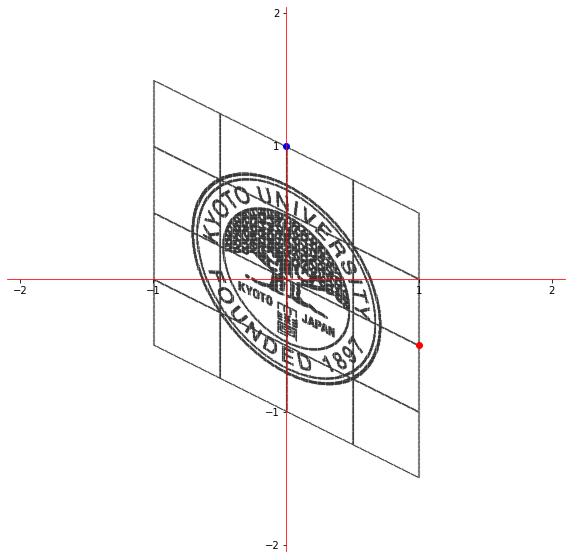

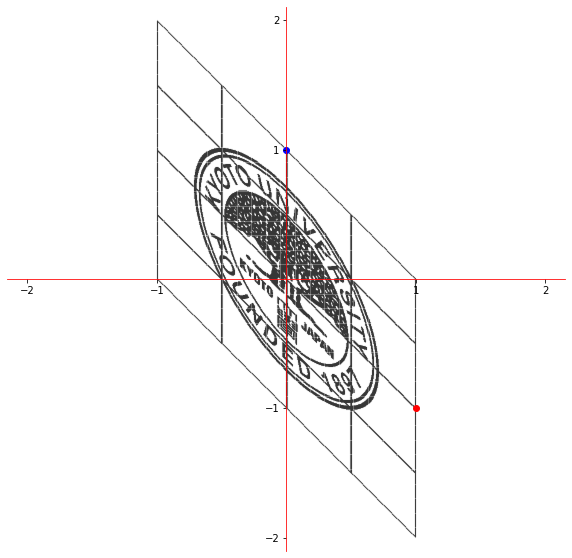

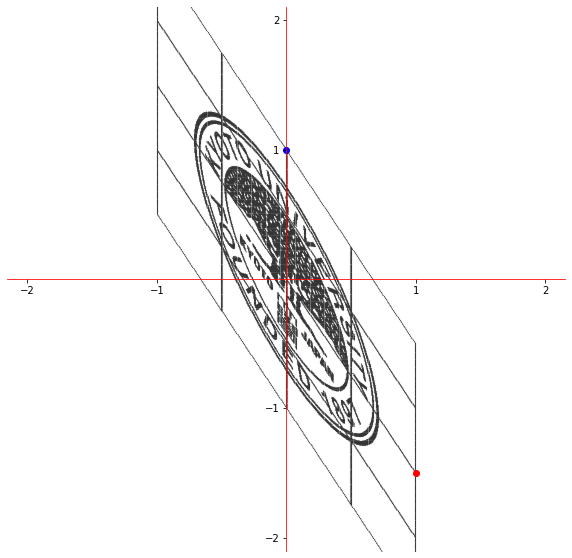

In [66]:
#練習問題50

a = np.array([[1,0],[-0.5,1]])
trans(a)
trans(np.linalg.matrix_power(a, 2))
trans(np.linalg.matrix_power(a, 3))

一つ目(v,w)=((0.8660254037844387+0.4999999999999999j),[(0.7071067811865476+0j), -0.7071067811865475j]
二つ目(v,w)=((0.8660254037844387-0.4999999999999999j),[(0.7071067811865476-0j), 0.7071067811865475j]


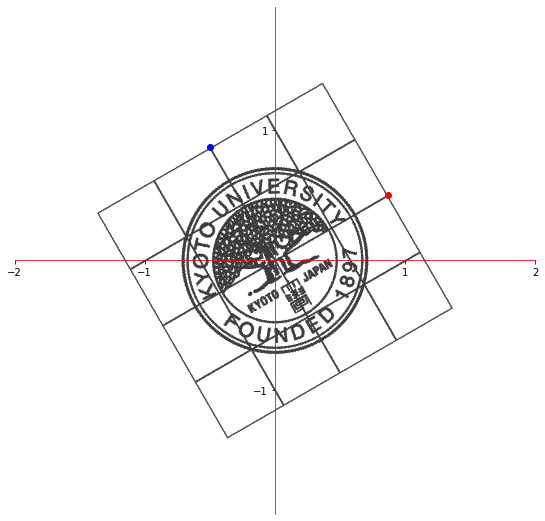

In [87]:
# 練習問題60-1

def eigen(a):
    showimage(a@image,a.max()+1)

    plt.scatter(a[0][0],a[1][0], c="red")
    plt.scatter(a[0][1],a[1][1], c="blue")
    v, w = np.linalg.eig(a)
    print(f"一つ目(v,w)=({v[0]},{[w[0][0],w[1][0]]}")
    print(f"二つ目(v,w)=({v[1]},{[w[0][1],w[1][1]]}")
    if(v[0].imag == 0.0):
        plt.plot([0,w[0][0]],[0,w[1][0]], 'b-', lw=3)    
        plt.plot([0,w[0][1]],[0,w[1][1]], 'r-', lw=3)     

eigen(rotate(30))

# 実数の範囲では存在しない。

一つ目(v,w)=(0.9999999999999999,[0.8660254037844387, 0.5]
二つ目(v,w)=(-1.0,[-0.5, 0.8660254037844387]
v=0.9999999999999999
w=[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


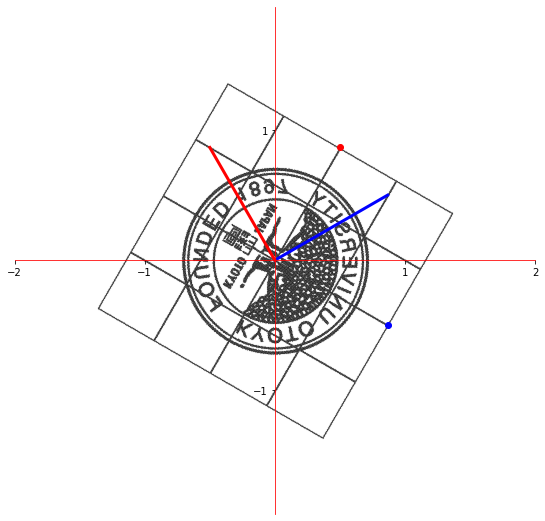

In [86]:
# 練習問題60-2
eigen(flip(30))

# 一つ目は 1, 二つ目は -1, それぞれ、折り返し面とその垂線

一つ目(v,w)=(1.316227766016838,[0.5345224838248488, 0.8451542547285166]
二つ目(v,w)=(0.683772233983162,[-0.5345224838248489, 0.8451542547285165]
一つ目(v,w)=(1.732455532033676,[0.5345224838248488, 0.8451542547285166]
二つ目(v,w)=(0.4675444679663242,[-0.5345224838248489, 0.8451542547285165]
一つ目(v,w)=(2.2803060746521977,[0.5345224838248488, 0.8451542547285166]
二つ目(v,w)=(0.3196939253478023,[-0.5345224838248489, 0.8451542547285166]


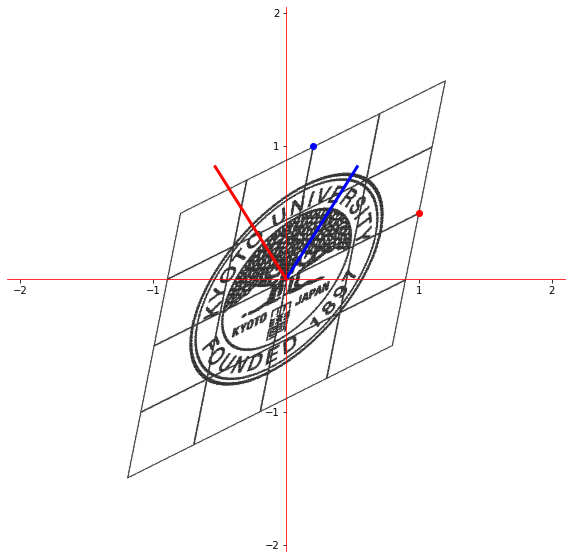

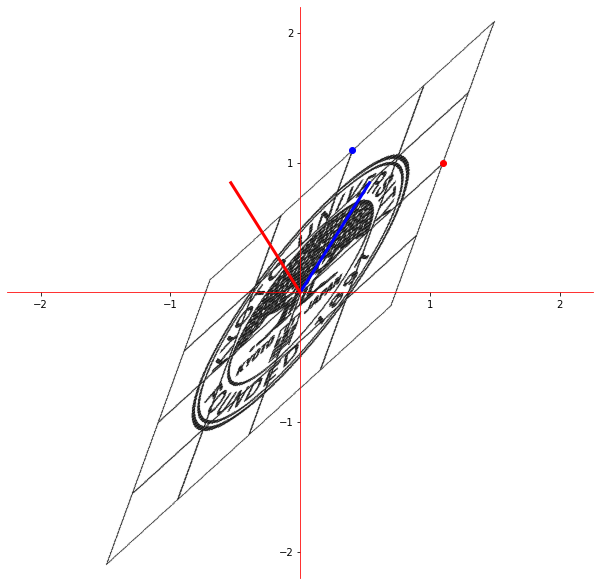

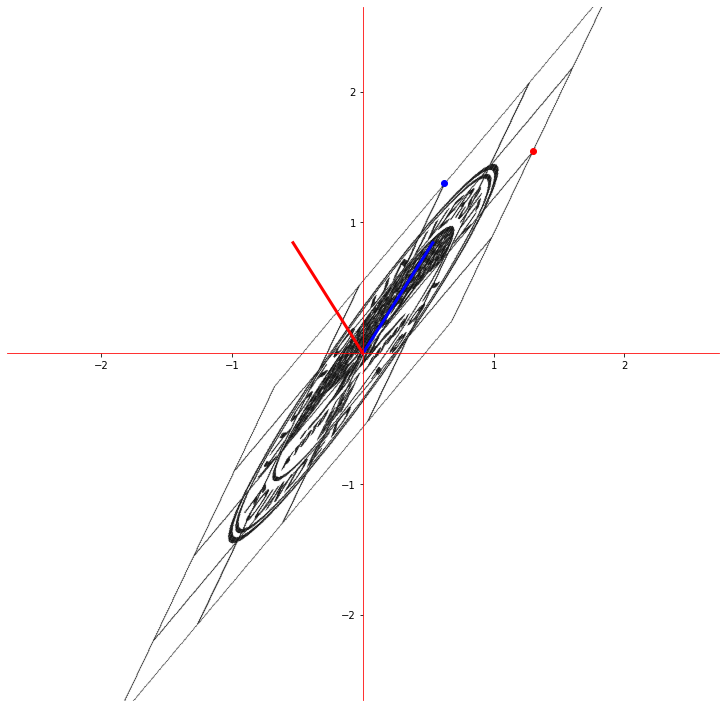

In [90]:
# 練習問題60-3
a = np.array([[1,0.2],[0.5,1]])
eigen(a)
eigen(np.linalg.matrix_power(a, 2))
eigen(np.linalg.matrix_power(a, 3))

# 片方の固有値の絶対値が1 より大きく、もう片方が 1 より小さいと、
# a を何度もかけると、a の固有値の大きい方の固有ベクトルの方に吸い寄せられていく。

一つ目(v,w)=(1.0,[0.0, 1.0]
二つ目(v,w)=(1.0,[4.440892098500626e-16, 1.0]
一つ目(v,w)=(1.0,[0.0, 1.0]
二つ目(v,w)=(1.0,[2.220446049250313e-16, 1.0]
一つ目(v,w)=(1.0,[0.0, 1.0]
二つ目(v,w)=(1.0,[1.4802973661668753e-16, 1.0]


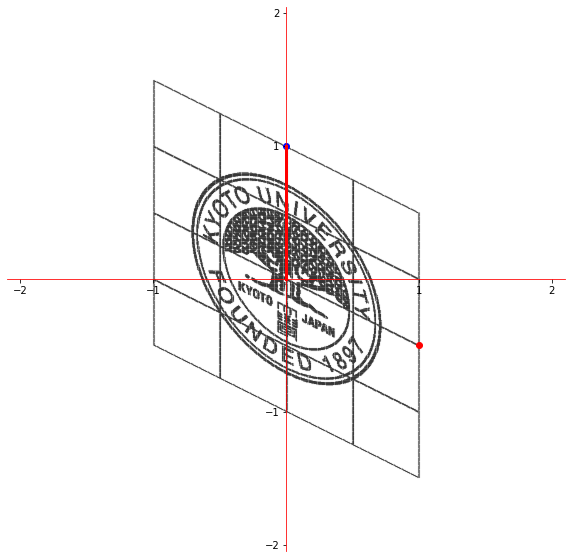

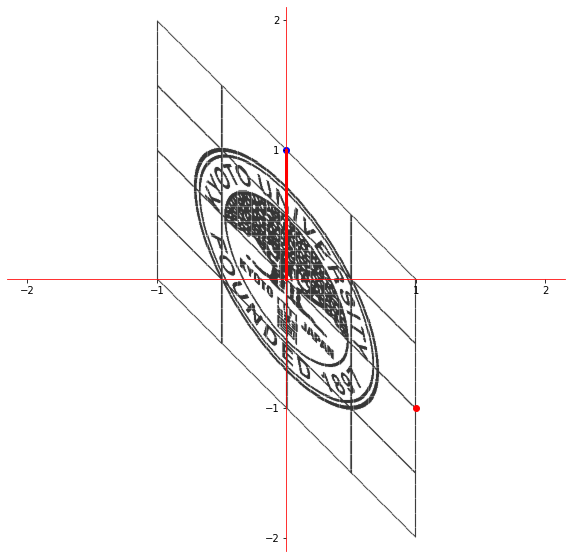

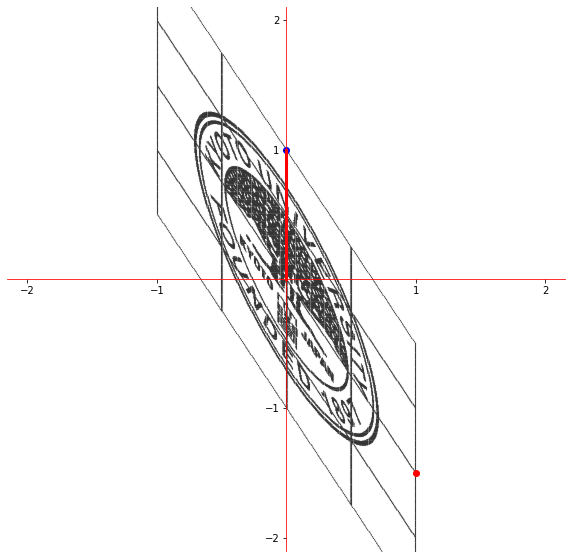

In [89]:
# 練習問題60-4
a = np.array([[1,0],[-0.5,1]])
eigen(a)
eigen(np.linalg.matrix_power(a, 2))
eigen(np.linalg.matrix_power(a, 3))

# 固有値は一つ。2つ目の固有ベクトルは、1つ目と同じ